In [1]:
import numpy as np

In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')
ran = np.random.randint(0, len(X), size=3)
X_ran = np.array([X[idx] for idx in ran])
Y_ran = np.array([Y[idx] for idx in ran])
X = np.vstack((X, X_ran))
Y = np.vstack((Y.reshape(len(Y), 1), Y_ran.reshape(len(Y_ran), 1)))
Y = Y.reshape(len(Y), )
print(X.shape)
print(Y.shape)

(5550, 50, 50, 3)
(5550,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[:20])

(4440,)
(1110,)
[1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0]


In [4]:
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', Y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y_train.min(),
                        Y_train.mean(), Y_train.std(), Y_train.max()))

Image dataset have shape = (4440, 50, 50, 3)
Image dataset has min/mean/std/max = 2.00/185.12/47.21/255.00

Train label has shape = (4440,)
Training label has min/mean/std/max = 0.00/0.50/0.50/1.00


In [5]:
# function to normalize data
def normalize_data(data): 
    data = data / data.max()
    return data

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
print('Image dataset have shape =', X_train.shape)
print('Image dataset has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X_train.min(),
                        X_train.mean(), X_train.std(), X_train.max()))
print('')
print('Train label has shape =', Y_train.shape)
print('Training label has min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y_train.min(),
                        Y_train.mean(), Y_train.std(), Y_train.max()))

Image dataset have shape = (4440, 50, 50, 3)
Image dataset has min/mean/std/max = 0.01/0.73/0.19/1.00

Train label has shape = (4440,)
Training label has min/mean/std/max = 0.00/0.50/0.50/1.00


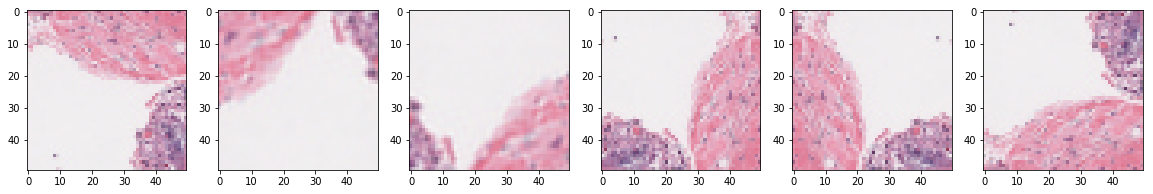

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
def transpose_3D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    for i in range(X.shape[2]):
        temp = X[:,:,i].T
        toReturn[:,:,i] = temp
    return toReturn

def inverse_3D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    for i in range(X.shape[2]):
        temp = np.linalg.inv(X[:,:,i])
        toReturn[:,:,i] = temp
    return toReturn

def rotate_in_3D(X):
    from scipy import ndimage, misc
    toReturn = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    for i in range(X.shape[2]):
        temp = ndimage.zoom(X[:,:,i], 1.5)
        temp = ndimage.rotate(temp, 60, reshape=False)
        length = temp.shape[0]
        temp = temp[15:65, 15:65]
        toReturn[:,:,i] = temp
    return toReturn

    
fig,axs = plt.subplots(1,6, figsize=(20,20))
n = np.random.randint(0,X_train.shape[0]-2)
transpose_3D(X_train[n])
axs[0].imshow(X_train[n])
axs[1].imshow(rotate_in_3D(X_train[n]))
axs[2].imshow(np.rot90(rotate_in_3D(X_train[n]), 2))
axs[3].imshow(np.rot90(X_train[n], 3))
axs[4].imshow(transpose_3D(X_train[n]))
axs[5].imshow(np.rot90(transpose_3D(X_train[n]), 1))

# Augment

In [7]:
def augment(X, Y):
    length = len(X)
    Y_r = np.zeros(length*6)
    X_r = np.zeros((length*6, X.shape[1], X.shape[2], X.shape[3]))
    for i in range(length):
        if((i+1)%2501 == 0):
            print("Half way there!")
        X_r[i*6] = X[i]
        X_r[i*6 + 1] = rotate_in_3D(X[i])
        X_r[i*6 + 2] = np.rot90(rotate_in_3D(X[i]), 2)
        X_r[i*6 + 3] = np.rot90(X[i], 3)
        X_r[i*6 + 4] = transpose_3D(X[i])
        X_r[i*6 + 5] = np.rot90(transpose_3D(X[i]), 1)
        Y_r[i*6] = Y[i]
        Y_r[i*6+1] = int(Y[i])
        Y_r[i*6+2] = int(Y[i])
        Y_r[i*6+3] = int(Y[i])
        Y_r[i*6+4] = int(Y[i])
        Y_r[i*6+5] = int(Y[i])
    return X_r, Y_r


print(X_train.shape)
print(Y_train.shape)
X_train, Y_train = augment(X_train, Y_train)    
print(X_train.shape)
print(Y_train.shape)

(4440, 50, 50, 3)
(4440,)
Half way there!
(26640, 50, 50, 3)
(26640,)


# Shuffle

In [8]:
Y_train = Y_train.astype(int)
print(Y_train[:20])
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)
print(X_train.shape)
print(Y_train.shape)

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
(26640, 50, 50, 3)
(26640,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


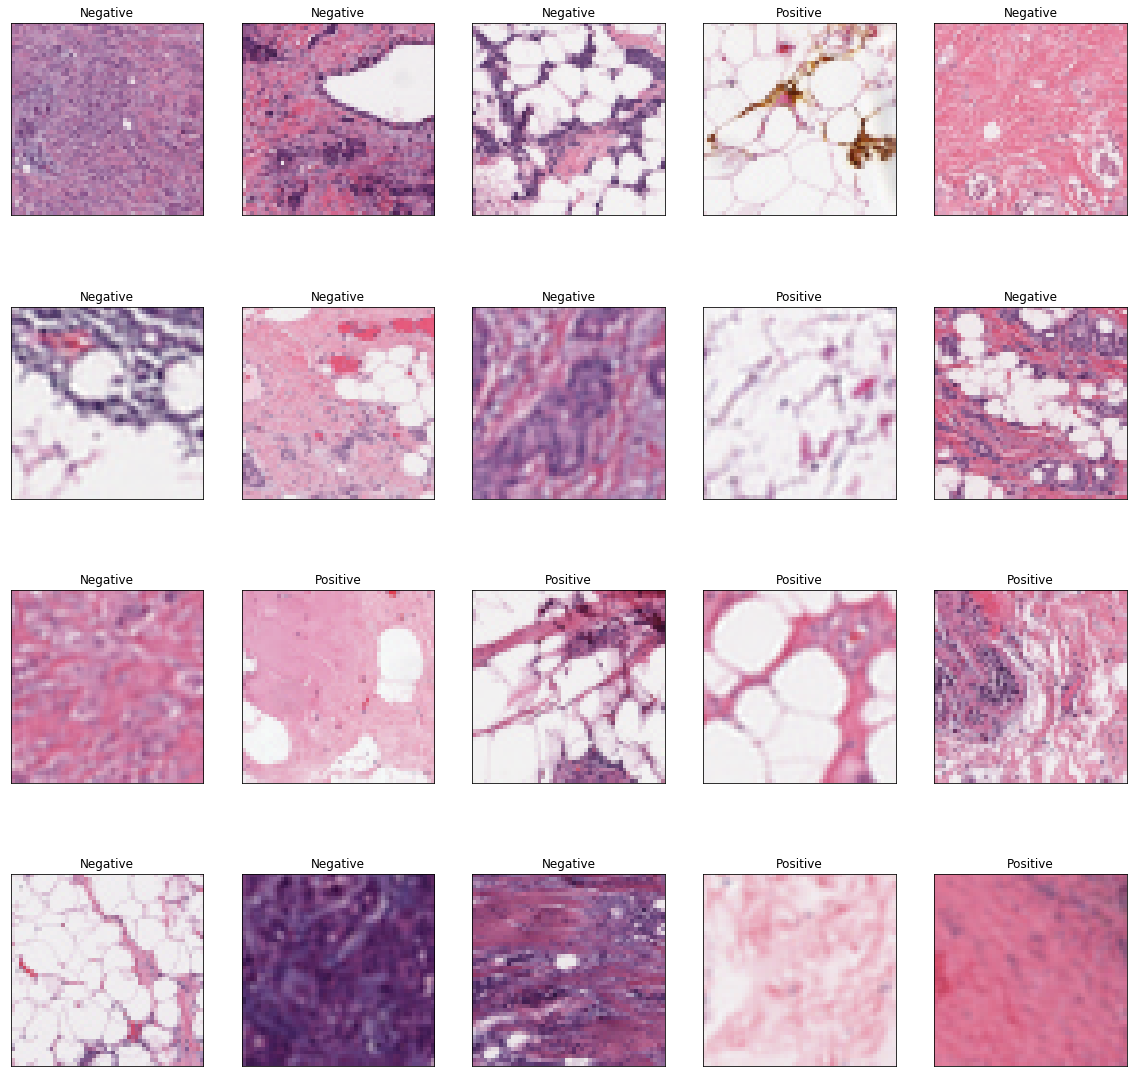

In [9]:
plt.figure(figsize=(20,20))
class_labels = ['Positive', 'Negative']
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_labels[Y_train[i]])
    plt.imshow(X_train[i])

# Train Neural Net

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils

In [12]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)

cuda:0


In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

torch.Size([555, 50, 50, 3])
torch.Size([555, 3, 50, 50])
3
50
50


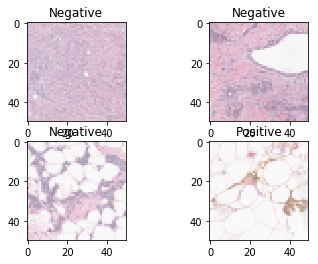

In [14]:
# Show images.
rows = 2
columns = 2
fig=plt.figure()
for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    plt.title(classes[labels[i]])
    img = images[i] / 2 + 0.5     # this is for unnormalize the image
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
plt.show()

# VGG 11

In [15]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

cuda:0
torch.Size([555, 50, 50, 3])
torch.Size([555, 3, 50, 50])
3
50
50


In [16]:
cfg = {
    'A' : [64,     'M', 128,      'M', 256, 256,           'M', 512, 512,           'M', 512, 512,           'M'],
    'B' : [64, 64, 'M', 128, 128, 'M', 256, 256,           'M', 512, 512,           'M', 512, 512,           'M']
}

class VGG(nn.Module):

    def __init__(self, features, num_class=100):
        super().__init__()
        self.features = features

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_class)
        )

    def forward(self, x):
        output = self.features(x)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
    
        return output

def make_layers(cfg, batch_norm=False):
    layers = []

    input_channel = 3
    for l in cfg:
        if l == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            continue

        layers += [nn.Conv2d(input_channel, l, kernel_size=3, padding=1)]

        if batch_norm:
            layers += [nn.BatchNorm2d(l)]
        
        layers += [nn.ReLU(inplace=True)]
        input_channel = l
    
    return nn.Sequential(*layers)

net = VGG(make_layers(cfg['A'], batch_norm=True))
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

In [17]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 100 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

[epoch: 0, i:     7] avg mini-batch loss: 2.240
[epoch: 0, i:    15] avg mini-batch loss: 0.681
[epoch: 0, i:    23] avg mini-batch loss: 0.576
[epoch: 0, i:    31] avg mini-batch loss: 0.542
[epoch: 0, i:    39] avg mini-batch loss: 0.523
[epoch: 0, i:    47] avg mini-batch loss: 0.533
[epoch: 1, i:     7] avg mini-batch loss: 0.487
[epoch: 1, i:    15] avg mini-batch loss: 0.489
[epoch: 1, i:    23] avg mini-batch loss: 0.508
[epoch: 1, i:    31] avg mini-batch loss: 0.493
[epoch: 1, i:    39] avg mini-batch loss: 0.487
[epoch: 1, i:    47] avg mini-batch loss: 0.492
[epoch: 2, i:     7] avg mini-batch loss: 0.443
[epoch: 2, i:    15] avg mini-batch loss: 0.459
[epoch: 2, i:    23] avg mini-batch loss: 0.490
[epoch: 2, i:    31] avg mini-batch loss: 0.460
[epoch: 2, i:    39] avg mini-batch loss: 0.462
[epoch: 2, i:    47] avg mini-batch loss: 0.473
[epoch: 3, i:     7] avg mini-batch loss: 0.427
[epoch: 3, i:    15] avg mini-batch loss: 0.439
[epoch: 3, i:    23] avg mini-batch loss

[epoch: 28, i:    15] avg mini-batch loss: 0.228
[epoch: 28, i:    23] avg mini-batch loss: 0.204
[epoch: 28, i:    31] avg mini-batch loss: 0.146
[epoch: 28, i:    39] avg mini-batch loss: 0.143
[epoch: 28, i:    47] avg mini-batch loss: 0.162
[epoch: 29, i:     7] avg mini-batch loss: 0.187
[epoch: 29, i:    15] avg mini-batch loss: 0.206
[epoch: 29, i:    23] avg mini-batch loss: 0.194
[epoch: 29, i:    31] avg mini-batch loss: 0.138
[epoch: 29, i:    39] avg mini-batch loss: 0.137
[epoch: 29, i:    47] avg mini-batch loss: 0.189
[epoch: 30, i:     7] avg mini-batch loss: 0.182
[epoch: 30, i:    15] avg mini-batch loss: 0.195
[epoch: 30, i:    23] avg mini-batch loss: 0.167
[epoch: 30, i:    31] avg mini-batch loss: 0.116
[epoch: 30, i:    39] avg mini-batch loss: 0.122
[epoch: 30, i:    47] avg mini-batch loss: 0.189
[epoch: 31, i:     7] avg mini-batch loss: 0.215
[epoch: 31, i:    15] avg mini-batch loss: 0.194
[epoch: 31, i:    23] avg mini-batch loss: 0.176
[epoch: 31, i:    31

[epoch: 56, i:    15] avg mini-batch loss: 0.005
[epoch: 56, i:    23] avg mini-batch loss: 0.006
[epoch: 56, i:    31] avg mini-batch loss: 0.007
[epoch: 56, i:    39] avg mini-batch loss: 0.007
[epoch: 56, i:    47] avg mini-batch loss: 0.008
[epoch: 57, i:     7] avg mini-batch loss: 0.009
[epoch: 57, i:    15] avg mini-batch loss: 0.007
[epoch: 57, i:    23] avg mini-batch loss: 0.008
[epoch: 57, i:    31] avg mini-batch loss: 0.005
[epoch: 57, i:    39] avg mini-batch loss: 0.007
[epoch: 57, i:    47] avg mini-batch loss: 0.010
[epoch: 58, i:     7] avg mini-batch loss: 0.008
[epoch: 58, i:    15] avg mini-batch loss: 0.009
[epoch: 58, i:    23] avg mini-batch loss: 0.010
[epoch: 58, i:    31] avg mini-batch loss: 0.011
[epoch: 58, i:    39] avg mini-batch loss: 0.009
[epoch: 58, i:    47] avg mini-batch loss: 0.019
[epoch: 59, i:     7] avg mini-batch loss: 0.011
[epoch: 59, i:    15] avg mini-batch loss: 0.010
[epoch: 59, i:    23] avg mini-batch loss: 0.011
[epoch: 59, i:    31

[epoch: 84, i:    15] avg mini-batch loss: 0.005
[epoch: 84, i:    23] avg mini-batch loss: 0.007
[epoch: 84, i:    31] avg mini-batch loss: 0.004
[epoch: 84, i:    39] avg mini-batch loss: 0.004
[epoch: 84, i:    47] avg mini-batch loss: 0.003
[epoch: 85, i:     7] avg mini-batch loss: 0.005
[epoch: 85, i:    15] avg mini-batch loss: 0.015
[epoch: 85, i:    23] avg mini-batch loss: 0.014
[epoch: 85, i:    31] avg mini-batch loss: 0.017
[epoch: 85, i:    39] avg mini-batch loss: 0.011
[epoch: 85, i:    47] avg mini-batch loss: 0.010
[epoch: 86, i:     7] avg mini-batch loss: 0.007
[epoch: 86, i:    15] avg mini-batch loss: 0.006
[epoch: 86, i:    23] avg mini-batch loss: 0.007
[epoch: 86, i:    31] avg mini-batch loss: 0.007
[epoch: 86, i:    39] avg mini-batch loss: 0.008
[epoch: 86, i:    47] avg mini-batch loss: 0.017
[epoch: 87, i:     7] avg mini-batch loss: 0.011
[epoch: 87, i:    15] avg mini-batch loss: 0.013
[epoch: 87, i:    23] avg mini-batch loss: 0.006
[epoch: 87, i:    31

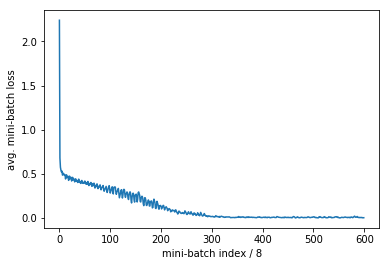

In [18]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [19]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

1110
Accuracy of the network on the test images: 79 %


In [20]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Positive : 87 %
Accuracy of Negative : 70 %


# VGG 13

In [21]:
transform = transforms.Compose(
 [transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor_x = torch.stack([torch.Tensor(i) for i in X_train]) # transform to torch tensors
tensor_y = torch.from_numpy(Y_train)
trainset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(trainset,  batch_size=555)
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]) # transform to torch tensors
tensor_y_test = torch.from_numpy(Y_test)
testset = utils.TensorDataset(tensor_x_test,tensor_y_test) # create your datset
testloader = utils.DataLoader(testset,  batch_size=555)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
classes = ('Positive', 'Negative')
print(device)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
images = images.permute(0, 3, 1, 2)
print(images.size())
temp = images.numpy()
print(len(temp[0]))
print(len(temp[0][0]))
print(len(temp[0][0][0]))

cuda:0
torch.Size([555, 50, 50, 3])
torch.Size([555, 3, 50, 50])
3
50
50


In [22]:
net = VGG(make_layers(cfg['B'], batch_norm=True))
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [23]:
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
#opt = torch.optim.Adadelta(net.parameters(), lr=0.0005, rho=0.9) #TODO
#opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
opt = torch.optim.Adam(net.parameters(), lr=0.0005)
avg_losses = [] # Avg. losses.
epochs = 100 # Total epochs.
print_freq = 8 # Print frequency.
for epoch in range(epochs): # Loop over the dataset multiple times.
    running_loss = 0.0 # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        inputs = inputs.permute(0, 3, 1, 2)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()
        # Forward step.
        outputs = net(inputs)
        #print(outputs)
        #print(labels)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()
        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several minibatches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
print('Finished Training.')

[epoch: 0, i:     7] avg mini-batch loss: 1.814
[epoch: 0, i:    15] avg mini-batch loss: 0.596
[epoch: 0, i:    23] avg mini-batch loss: 0.565
[epoch: 0, i:    31] avg mini-batch loss: 0.527
[epoch: 0, i:    39] avg mini-batch loss: 0.514
[epoch: 0, i:    47] avg mini-batch loss: 0.536
[epoch: 1, i:     7] avg mini-batch loss: 0.484
[epoch: 1, i:    15] avg mini-batch loss: 0.486
[epoch: 1, i:    23] avg mini-batch loss: 0.499
[epoch: 1, i:    31] avg mini-batch loss: 0.481
[epoch: 1, i:    39] avg mini-batch loss: 0.481
[epoch: 1, i:    47] avg mini-batch loss: 0.485
[epoch: 2, i:     7] avg mini-batch loss: 0.443
[epoch: 2, i:    15] avg mini-batch loss: 0.456
[epoch: 2, i:    23] avg mini-batch loss: 0.482
[epoch: 2, i:    31] avg mini-batch loss: 0.459
[epoch: 2, i:    39] avg mini-batch loss: 0.459
[epoch: 2, i:    47] avg mini-batch loss: 0.473
[epoch: 3, i:     7] avg mini-batch loss: 0.430
[epoch: 3, i:    15] avg mini-batch loss: 0.439
[epoch: 3, i:    23] avg mini-batch loss

[epoch: 28, i:    15] avg mini-batch loss: 0.221
[epoch: 28, i:    23] avg mini-batch loss: 0.229
[epoch: 28, i:    31] avg mini-batch loss: 0.166
[epoch: 28, i:    39] avg mini-batch loss: 0.112
[epoch: 28, i:    47] avg mini-batch loss: 0.134
[epoch: 29, i:     7] avg mini-batch loss: 0.157
[epoch: 29, i:    15] avg mini-batch loss: 0.214
[epoch: 29, i:    23] avg mini-batch loss: 0.213
[epoch: 29, i:    31] avg mini-batch loss: 0.158
[epoch: 29, i:    39] avg mini-batch loss: 0.107
[epoch: 29, i:    47] avg mini-batch loss: 0.136
[epoch: 30, i:     7] avg mini-batch loss: 0.158
[epoch: 30, i:    15] avg mini-batch loss: 0.241
[epoch: 30, i:    23] avg mini-batch loss: 0.223
[epoch: 30, i:    31] avg mini-batch loss: 0.157
[epoch: 30, i:    39] avg mini-batch loss: 0.104
[epoch: 30, i:    47] avg mini-batch loss: 0.106
[epoch: 31, i:     7] avg mini-batch loss: 0.161
[epoch: 31, i:    15] avg mini-batch loss: 0.206
[epoch: 31, i:    23] avg mini-batch loss: 0.207
[epoch: 31, i:    31

[epoch: 56, i:    15] avg mini-batch loss: 0.019
[epoch: 56, i:    23] avg mini-batch loss: 0.026
[epoch: 56, i:    31] avg mini-batch loss: 0.019
[epoch: 56, i:    39] avg mini-batch loss: 0.020
[epoch: 56, i:    47] avg mini-batch loss: 0.020
[epoch: 57, i:     7] avg mini-batch loss: 0.018
[epoch: 57, i:    15] avg mini-batch loss: 0.012
[epoch: 57, i:    23] avg mini-batch loss: 0.017
[epoch: 57, i:    31] avg mini-batch loss: 0.019
[epoch: 57, i:    39] avg mini-batch loss: 0.017
[epoch: 57, i:    47] avg mini-batch loss: 0.013
[epoch: 58, i:     7] avg mini-batch loss: 0.015
[epoch: 58, i:    15] avg mini-batch loss: 0.016
[epoch: 58, i:    23] avg mini-batch loss: 0.023
[epoch: 58, i:    31] avg mini-batch loss: 0.014
[epoch: 58, i:    39] avg mini-batch loss: 0.014
[epoch: 58, i:    47] avg mini-batch loss: 0.016
[epoch: 59, i:     7] avg mini-batch loss: 0.013
[epoch: 59, i:    15] avg mini-batch loss: 0.010
[epoch: 59, i:    23] avg mini-batch loss: 0.017
[epoch: 59, i:    31

[epoch: 84, i:    15] avg mini-batch loss: 0.009
[epoch: 84, i:    23] avg mini-batch loss: 0.008
[epoch: 84, i:    31] avg mini-batch loss: 0.005
[epoch: 84, i:    39] avg mini-batch loss: 0.006
[epoch: 84, i:    47] avg mini-batch loss: 0.006
[epoch: 85, i:     7] avg mini-batch loss: 0.008
[epoch: 85, i:    15] avg mini-batch loss: 0.005
[epoch: 85, i:    23] avg mini-batch loss: 0.009
[epoch: 85, i:    31] avg mini-batch loss: 0.013
[epoch: 85, i:    39] avg mini-batch loss: 0.015
[epoch: 85, i:    47] avg mini-batch loss: 0.021
[epoch: 86, i:     7] avg mini-batch loss: 0.016
[epoch: 86, i:    15] avg mini-batch loss: 0.013
[epoch: 86, i:    23] avg mini-batch loss: 0.012
[epoch: 86, i:    31] avg mini-batch loss: 0.006
[epoch: 86, i:    39] avg mini-batch loss: 0.005
[epoch: 86, i:    47] avg mini-batch loss: 0.004
[epoch: 87, i:     7] avg mini-batch loss: 0.006
[epoch: 87, i:    15] avg mini-batch loss: 0.007
[epoch: 87, i:    23] avg mini-batch loss: 0.009
[epoch: 87, i:    31

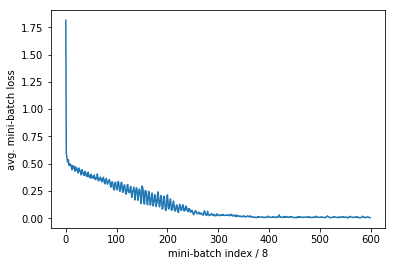

In [24]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [25]:
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

1110
Accuracy of the network on the test images: 80 %


In [26]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(555):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Positive : 88 %
Accuracy of Negative : 73 %
